In [5]:
import keras
import keras.src.layers as layers

In [22]:

import tensorflow as tf
from keras.api.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = tf.pad(train_X[..., tf.newaxis], [[0, 0], [2, 2], [2, 2], [0, 0]]).numpy()
test_X = tf.pad(test_X[..., tf.newaxis], [[0, 0], [2, 2], [2, 2], [0, 0]]).numpy()

train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)


In [7]:
learning_rate = 0.001

model = keras.Sequential()
model.add(layers.Conv2D(strides=1, filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=1, activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy'])

C:\Users\anzhi\PycharmProjects\tpnn\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\anzhi\PycharmProjects\tpnn\.venv\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


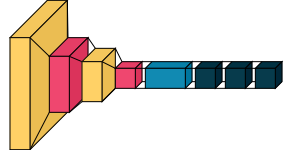

In [8]:
import visualkeras

visualkeras.layered_view(model)

In [9]:
from matplotlib import pyplot as plt
import shutil

log_dir = "logs/fit/"
shutil.rmtree("./logs", ignore_errors=True)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs_num = 10
history = model.fit(train_X, train_y,
                    batch_size=128,
                    verbose=0,
                    epochs=epochs_num,
                    callbacks=[tensorboard_callback],
                    validation_data=(test_X, test_y))

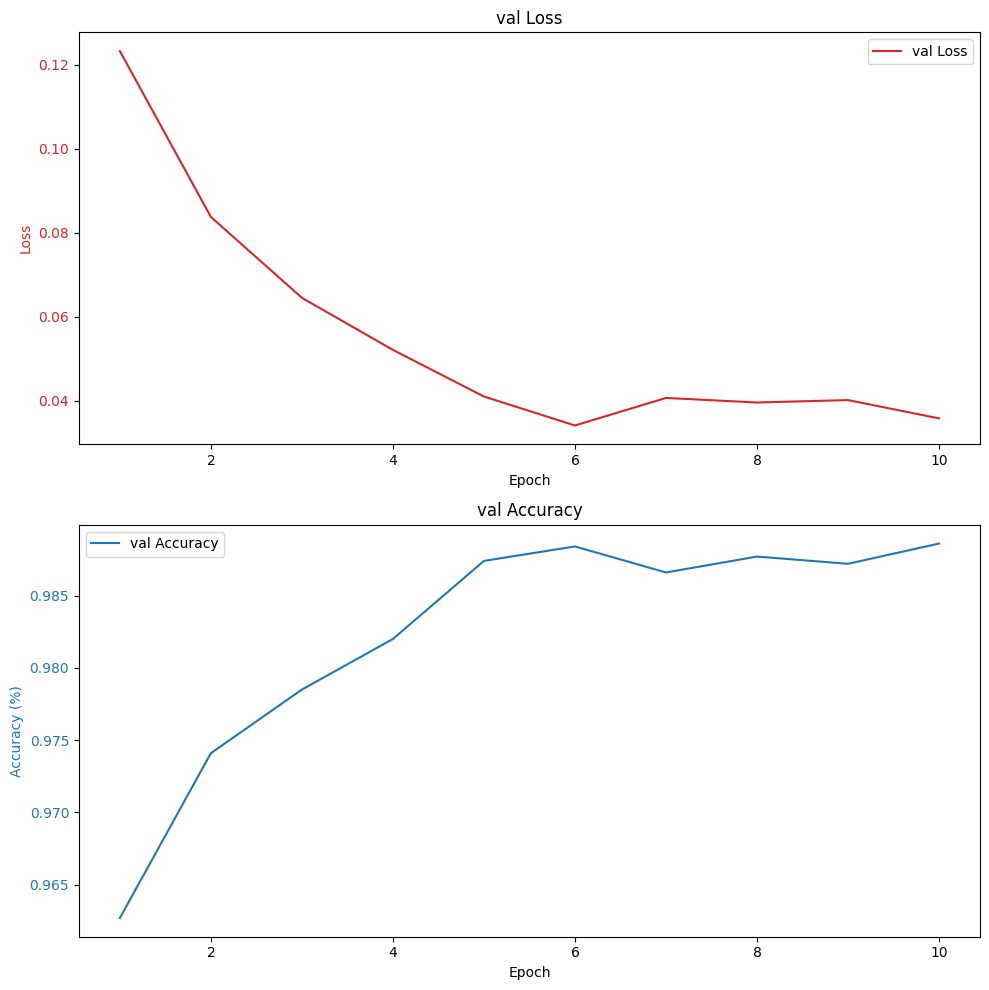

In [10]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, len(history.history["val_loss"]) + 1), history.history["val_loss"], color=color, label='val Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper right')
ax1.set_title("val Loss")

color = 'tab:blue'
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(range(1, len(history.history["val_accuracy"]) + 1), history.history["val_accuracy"], color=color, label='val Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper left')
ax2.set_title("val Accuracy")

plt.tight_layout()
plt.show()

In [11]:
%load_ext tensorboard
%tensorboard --logdir logs/fit


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10792), started 7 days, 0:13:59 ago. (Use '!kill 10792' to kill it.)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


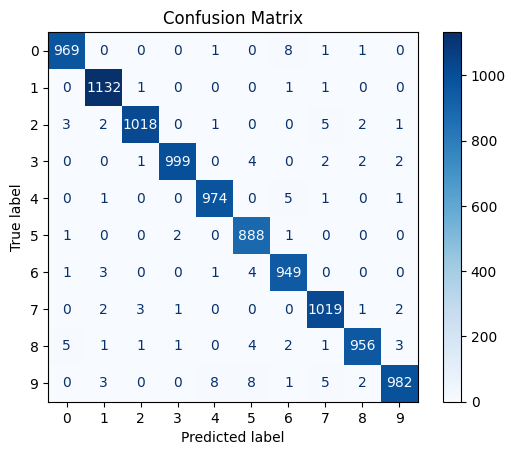

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(test_X)
y_pred = np.argmax(y_pred, axis=1)
tmp = []
for i in range(len(test_y)):
    tmp.append(int(np.argmax(test_y[i])))
y_true = np.array(tmp)


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()